In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
import keras

print(tf.__version__)   # 2.16.1
print(keras.__version__)  # 3.3.3

2.16.1
3.3.3


In [ ]:
pip install tensorflow==2.16.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 107.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 99.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 108.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 79.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 40.8 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    

In [ ]:
import zipfile
import os

# Zip dosyasının yolunu belirtin
zip_path = '/content/drive/MyDrive/images.zip'
extract_path = '/content/drive/MyDrive/images/'

# Klasörü oluşturun
os.makedirs(extract_path, exist_ok=True)

# Zip dosyasını açın ve çıkarın
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dosya başarıyla çıkarıldı.")

Dosya başarıyla çıkarıldı.


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from tensorflow.keras.applications import VGG16, InceptionResNetV2
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax

In [ ]:
train_dir = "/content/drive/MyDrive/images/train"
test_dir = "/content/drive/MyDrive/images/validation"

In [ ]:
import tensorflow as tf
import keras
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization

model= tf.keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(512,(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

In [ ]:
img_size=48

In [ ]:
train_datagen = ImageDataGenerator(width_shift_range = 0.1,
                                         height_shift_range = 0.1,
                                         horizontal_flip = True,
                                         rescale = 1./255,
                                         validation_split = 0.2
                                        )
validation_datagen = ImageDataGenerator(rescale = 1./255,
                                         validation_split = 0.2)

In [ ]:
train_generator = train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (img_size,img_size),
                                                    batch_size = 64,
                                                    color_mode = "grayscale",
                                                    class_mode = "categorical",
                                                    subset = "training"
                                                   )
validation_generator = validation_datagen.flow_from_directory( directory = test_dir,
                                                              target_size = (img_size,img_size),
                                                              batch_size = 64,
                                                              color_mode = "grayscale",
                                                              class_mode = "categorical",
                                                              subset = "validation"
                                                             )

Found 46765 images belonging to 7 classes.
Found 1411 images belonging to 7 classes.


In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer = Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
epochs = 15
batch_size = 64

In [ ]:
model.fit(x = train_generator,epochs = epochs,validation_data = validation_generator)

Epoch 1/15
731/731 ━━━━━━━━━━━━━━━━━━━━ 131s 157ms/step - accuracy: 0.2212 - loss: 2.1216 - val_accuracy: 0.3473 - val_loss: 1.6724
Epoch 2/15
731/731 ━━━━━━━━━━━━━━━━━━━━ 106s 144ms/step - accuracy: 0.4209 - loss: 1.5080 - val_accuracy: 0.4883 - val_loss: 1.3282
Epoch 3/15
731/731 ━━━━━━━━━━━━━━━━━━━━ 105s 142ms/step - accuracy: 0.5230 - loss: 1.2499 - val_accuracy: 0.5535 - val_loss: 1.1500
Epoch 4/15
731/731 ━━━━━━━━━━━━━━━━━━━━ 105s 142ms/step - accuracy: 0.5610 - loss: 1.1582 - val_accuracy: 0.5159 - val_loss: 1.2686
Epoch 5/15
731/731 ━━━━━━━━━━━━━━━━━━━━ 105s 142ms/step - accuracy: 0.5873 - loss: 1.0893 - val_accuracy: 0.5932 - val_loss: 1.0946
Epoch 6/15
731/731 ━━━━━━━━━━━━━━━━━━━━ 104s 141ms/step - accuracy: 0.6022 - loss: 1.0580 - val_accuracy: 0.5982 - val_loss: 1.0535
Epoch 7/15
731/731 ━━━━━━━━━━━━━━━━━━━━ 105s 142ms/step - accuracy: 0.6114 - loss: 1.0359 - val_accuracy: 0.6286 - val_loss: 0.9899
Epoch 8/15
731/731 ━━━━━━━━━━━━━━━━━━━━ 105s 142ms/step - accuracy: 0.6244 -

In [ ]:
epochs = 5
batch_size = 64

In [ ]:
model.fit(x = train_generator,epochs = epochs,validation_data = validation_generator)

Epoch 1/5
731/731 ━━━━━━━━━━━━━━━━━━━━ 105s 142ms/step - accuracy: 0.6702 - loss: 0.8845 - val_accuracy: 0.6364 - val_loss: 0.9174
Epoch 2/5
731/731 ━━━━━━━━━━━━━━━━━━━━ 105s 142ms/step - accuracy: 0.6786 - loss: 0.8522 - val_accuracy: 0.7002 - val_loss: 0.8004
Epoch 3/5
731/731 ━━━━━━━━━━━━━━━━━━━━ 106s 143ms/step - accuracy: 0.6902 - loss: 0.8352 - val_accuracy: 0.6804 - val_loss: 0.8039
Epoch 4/5
731/731 ━━━━━━━━━━━━━━━━━━━━ 105s 142ms/step - accuracy: 0.6919 - loss: 0.8276 - val_accuracy: 0.7130 - val_loss: 0.7532
Epoch 5/5
731/731 ━━━━━━━━━━━━━━━━━━━━ 105s 143ms/step - accuracy: 0.6957 - loss: 0.8196 - val_accuracy: 0.7130 - val_loss: 0.7689


In [ ]:
epochs = 15
batch_size = 64

In [ ]:
model.fit(x = train_generator,epochs = epochs,validation_data = validation_generator)

Epoch 1/15
731/731 ━━━━━━━━━━━━━━━━━━━━ 104s 141ms/step - accuracy: 0.7021 - loss: 0.8029 - val_accuracy: 0.7364 - val_loss: 0.7354
Epoch 2/15
731/731 ━━━━━━━━━━━━━━━━━━━━ 104s 141ms/step - accuracy: 0.7095 - loss: 0.7858 - val_accuracy: 0.7186 - val_loss: 0.7424
Epoch 3/15
731/731 ━━━━━━━━━━━━━━━━━━━━ 105s 143ms/step - accuracy: 0.7067 - loss: 0.7966 - val_accuracy: 0.7243 - val_loss: 0.7425
Epoch 4/15
731/731 ━━━━━━━━━━━━━━━━━━━━ 104s 140ms/step - accuracy: 0.7177 - loss: 0.7674 - val_accuracy: 0.7243 - val_loss: 0.7333
Epoch 5/15
731/731 ━━━━━━━━━━━━━━━━━━━━ 105s 142ms/step - accuracy: 0.7120 - loss: 0.7679 - val_accuracy: 0.7385 - val_loss: 0.7178
Epoch 6/15
731/731 ━━━━━━━━━━━━━━━━━━━━ 104s 141ms/step - accuracy: 0.7233 - loss: 0.7542 - val_accuracy: 0.7470 - val_loss: 0.6883
Epoch 7/15
731/731 ━━━━━━━━━━━━━━━━━━━━ 104s 140ms/step - accuracy: 0.7311 - loss: 0.7353 - val_accuracy: 0.7420 - val_loss: 0.6750
Epoch 8/15
731/731 ━━━━━━━━━━━━━━━━━━━━ 105s 143ms/step - accuracy: 0.7346 -

In [ ]:
model.save('model_10.keras')

In [ ]:
epochs = 15
batch_size = 64

In [ ]:
history = model.fit(x = train_generator,epochs = epochs,validation_data = validation_generator)

Epoch 1/15
731/731 ━━━━━━━━━━━━━━━━━━━━ 104s 141ms/step - accuracy: 0.7554 - loss: 0.6641 - val_accuracy: 0.7470 - val_loss: 0.6662
Epoch 2/15
731/731 ━━━━━━━━━━━━━━━━━━━━ 103s 139ms/step - accuracy: 0.7583 - loss: 0.6576 - val_accuracy: 0.7902 - val_loss: 0.5622
Epoch 3/15
731/731 ━━━━━━━━━━━━━━━━━━━━ 103s 140ms/step - accuracy: 0.7619 - loss: 0.6543 - val_accuracy: 0.7867 - val_loss: 0.5623
Epoch 4/15
731/731 ━━━━━━━━━━━━━━━━━━━━ 103s 140ms/step - accuracy: 0.7630 - loss: 0.6491 - val_accuracy: 0.7888 - val_loss: 0.5684
Epoch 5/15
731/731 ━━━━━━━━━━━━━━━━━━━━ 102s 138ms/step - accuracy: 0.7626 - loss: 0.6476 - val_accuracy: 0.7753 - val_loss: 0.5841
Epoch 6/15
731/731 ━━━━━━━━━━━━━━━━━━━━ 103s 140ms/step - accuracy: 0.7680 - loss: 0.6344 - val_accuracy: 0.7895 - val_loss: 0.5752
Epoch 7/15
731/731 ━━━━━━━━━━━━━━━━━━━━ 102s 138ms/step - accuracy: 0.7696 - loss: 0.6245 - val_accuracy: 0.8037 - val_loss: 0.5491
Epoch 8/15
731/731 ━━━━━━━━━━━━━━━━━━━━ 100s 135ms/step - accuracy: 0.7752 -

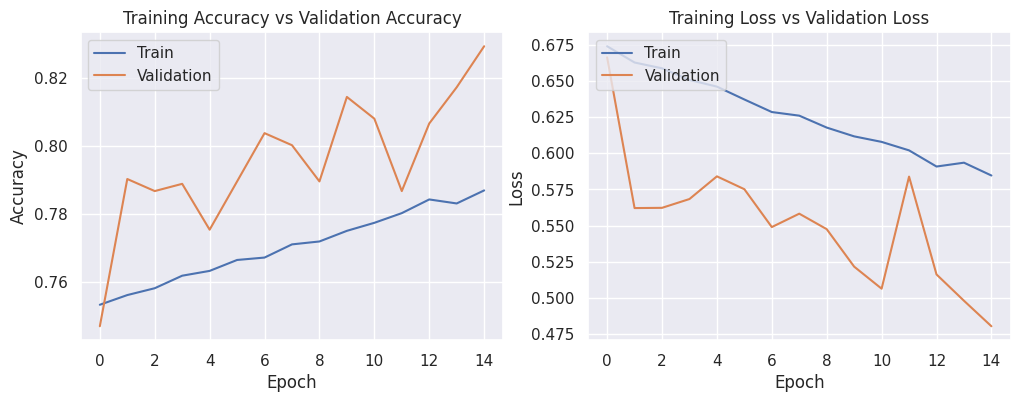

In [ ]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [ ]:
model.save('model_11.keras')

In [ ]:
# Importing necessary libraries
import numpy as np

# Access class indices
class_indices = train_generator.class_indices
print("Class Indices:", class_indices)

# Initialize a dictionary to store the count of images per class
train_class_counts = {class_name: 0 for class_name in class_indices}
validation_class_counts = {class_name: 0 for class_name in class_indices}

# Count the number of images per class in the training set
for _, labels in train_generator:
    for label in labels:
        class_name = list(class_indices.keys())[list(class_indices.values()).index(np.argmax(label))]
        train_class_counts[class_name] += 1

    if train_generator.batch_index == 0:
        break

# Count the number of images per class in the validation set
for _, labels in validation_generator:
    for label in labels:
        class_name = list(class_indices.keys())[list(class_indices.values()).index(np.argmax(label))]
        validation_class_counts[class_name] += 1

    if validation_generator.batch_index == 0:
        break

# Display the counts
print("Training set class counts:", train_class_counts)
print("Validation set class counts:", validation_class_counts)


Class Indices: {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}
Training set class counts: {'angry': 6499, 'disgust': 794, 'fear': 6620, 'happy': 11669, 'neutral': 8001, 'sad': 7882, 'surprise': 5300}
Validation set class counts: {'angry': 192, 'disgust': 22, 'fear': 203, 'happy': 365, 'neutral': 243, 'sad': 227, 'surprise': 159}


In [ ]:
from tensorflow.keras.models import load_model

model = load_model('/content/model_11.keras')


In [ ]:
test_loss, test_acc = model.evaluate(validation_generator, verbose=2)
print(f'Test accuracy: {test_acc}')


23/23 - 3s - 138ms/step - accuracy: 0.8292 - loss: 0.4806
Test accuracy: 0.8291991353034973


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

img_path = '/content/drive/MyDrive/images/validation/fear/10029.jpg'  # Buraya sınıflandırmak istediğiniz görüntünün yolunu ekleyin
img = image.load_img(img_path, target_size=(48, 48), color_mode='grayscale')
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Batch dimension ekleniyor
img_array /= 255.0  # Normalizasyon


In [ ]:
predictions = model.predict(img_array)
class_idx = np.argmax(predictions[0])
class_labels = list(train_generator.class_indices.keys())
predicted_label = class_labels[class_idx]

print(f'The image is classified as: {predicted_label}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 808ms/step
The image is classified as: fear
